In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
categorical_features = ['Name','Sex','Ticket','Cabin','Embarked']
df_numerical = df.drop(columns = categorical_features)
df_numerical.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [6]:
df_numerical.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [7]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


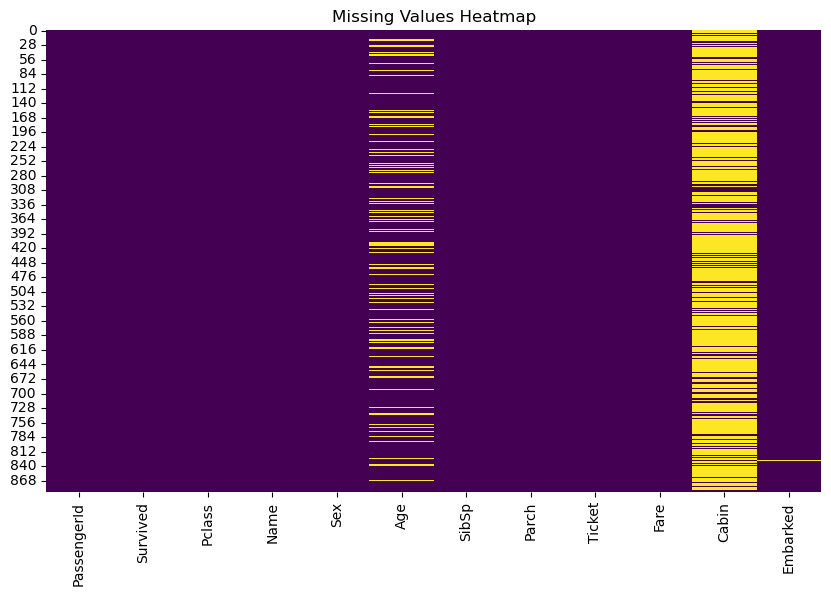

In [8]:
# Check missing values
print(df.isnull().sum())

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

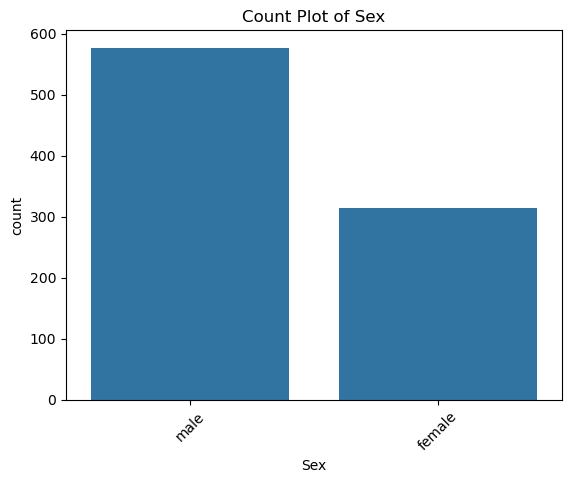

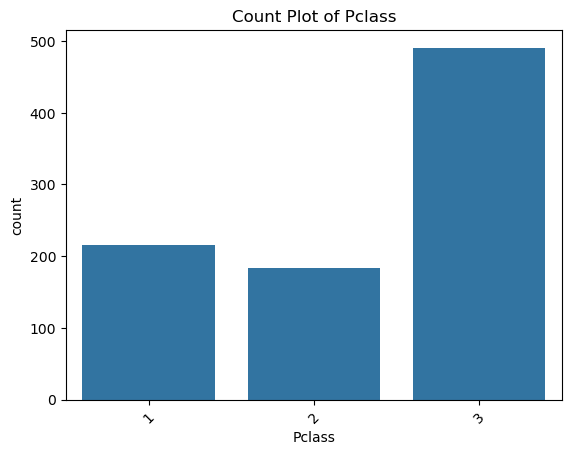

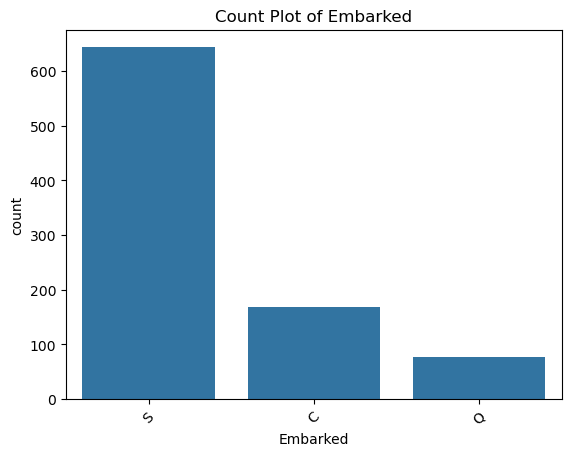

In [9]:
# Bar plot for categorical data
categorical_features = ['Sex', 'Pclass', 'Embarked']  # Use correct column names from df
for col in categorical_features:
    sns.countplot(data=df, x=col)
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
    plt.show()

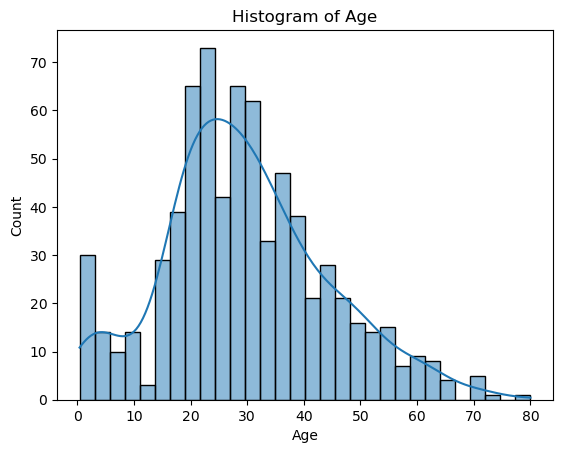

In [27]:
sns.histplot(df['Age'], kde=True, bins=30)
plt.title(f"Histogram of Age")
plt.show()

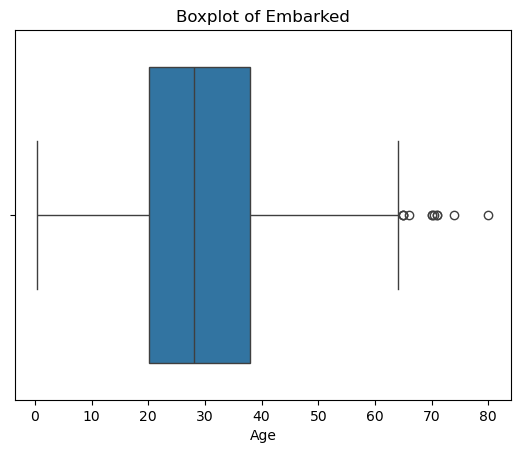

In [11]:
sns.boxplot(x=df['Age'])
plt.title(f"Boxplot of {col}")
plt.show()

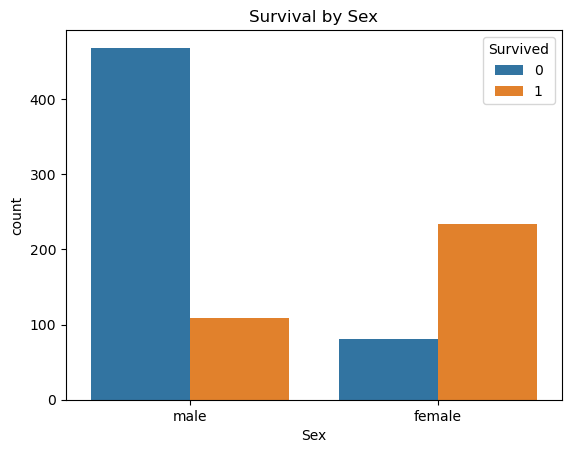

In [12]:
# Survival rate by sex
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Sex')
plt.show()

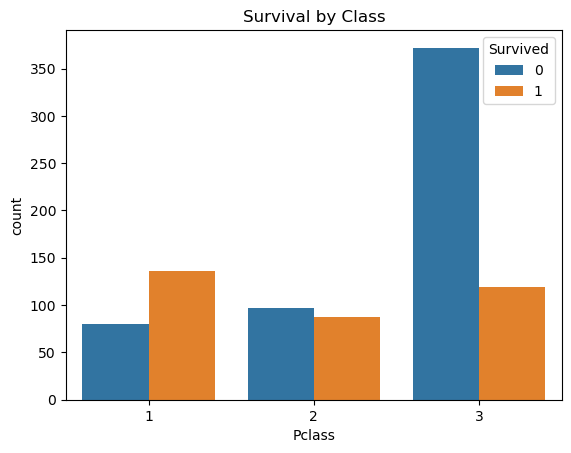

In [13]:
# Survival rate by class
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Class')
plt.show()

In [32]:
df[df["Age"]>50]["Survived"].value_counts(normalize= True)

Survived
0    0.65625
1    0.34375
Name: proportion, dtype: float64

In [ ]:
v = df.groupby(['Sex', 'Survived'])['Survived'].value_counts()
print(v)
print(v.values)
print(v.index)

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: count, dtype: int64
[ 81 233 468 109]
MultiIndex([('female', 0),
            ('female', 1),
            (  'male', 0),
            (  'male', 1)],
           names=['Sex', 'Survived'])


([0, 1, 2, 3],
 [Text(0, 0, 'non-survived females'),
  Text(1, 0, 'survived females'),
  Text(2, 0, 'non-survived males'),
  Text(3, 0, 'survived males')])

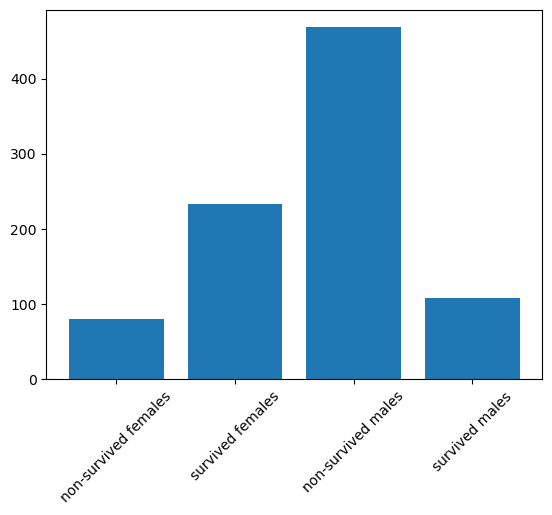

In [16]:
plt.bar(['non-survived females', 'survived females', 'non-survived males', 'survived males'], v.values)
plt.xticks(rotation=45)

<Axes: xlabel='SibSp', ylabel='Survived'>

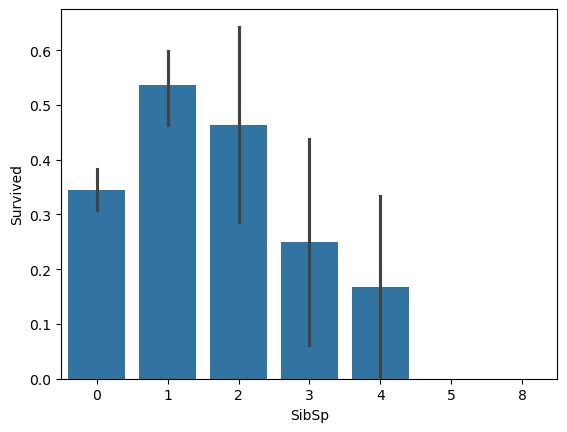

In [17]:
sns.barplot(data= df, x= 'SibSp', y='Survived')

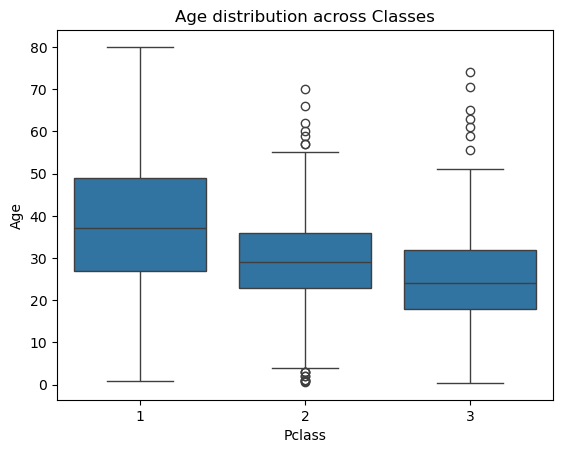

In [18]:
# Boxplot of age by class
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title("Age distribution across Classes")
plt.show()

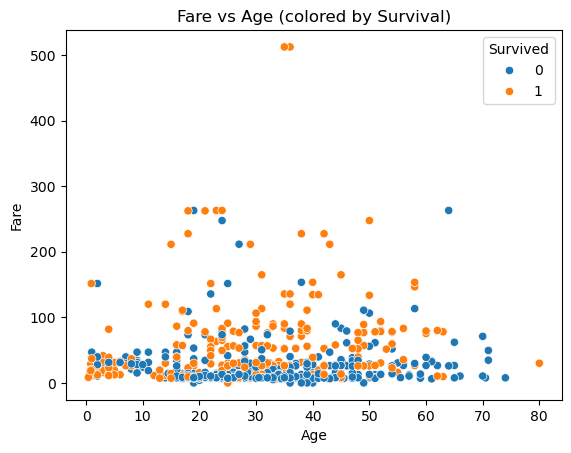

In [19]:
# Fare vs Age
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)
plt.title('Fare vs Age (colored by Survival)')
plt.show()


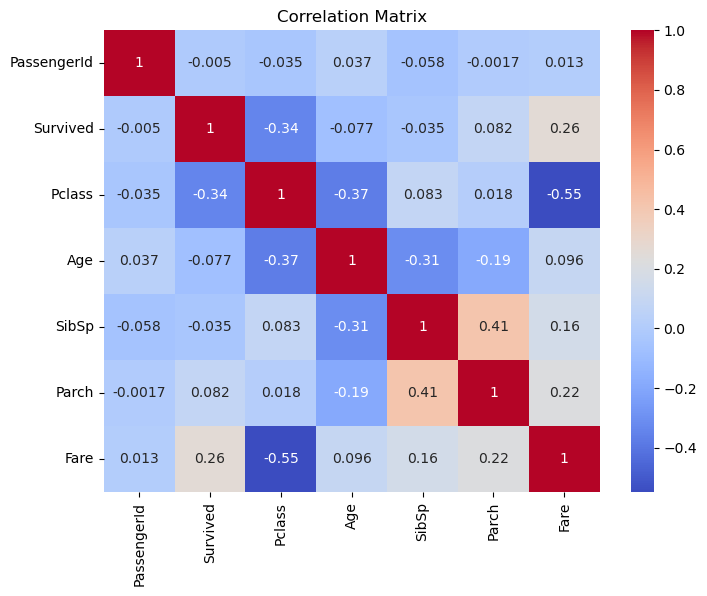

In [20]:
# Correlation matrix
corr_matrix = df_numerical.corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


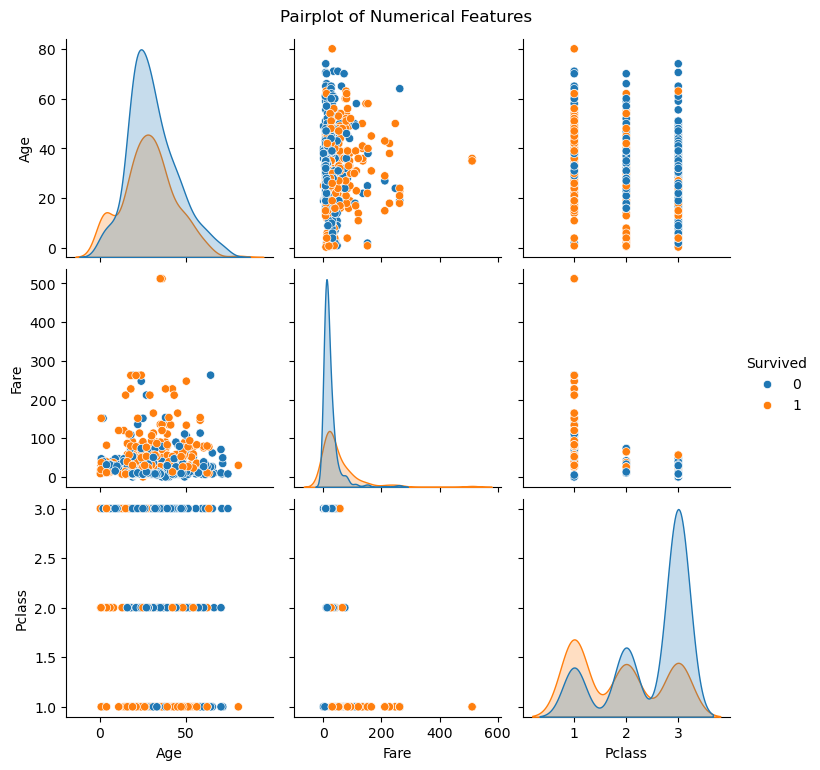

In [21]:
sns.pairplot(df[['Age', 'Fare', 'Pclass', 'Survived']].dropna(), hue='Survived')
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


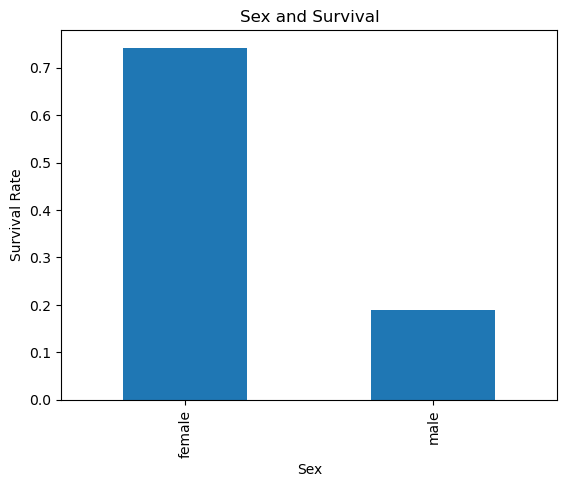

In [22]:
# Survival rate by sex
print(df.groupby('Sex')['Survived'].mean())

# Visualization
df.groupby('Sex')['Survived'].mean().plot(kind='bar', stacked=False)
plt.title("Sex and Survival")
plt.ylabel("Survival Rate")
plt.show()

Pclass  Survived
1       0           64.684007
        1           95.608029
2       0           19.412328
        1           22.055700
3       0           13.669364
        1           13.694887
Name: Fare, dtype: float64


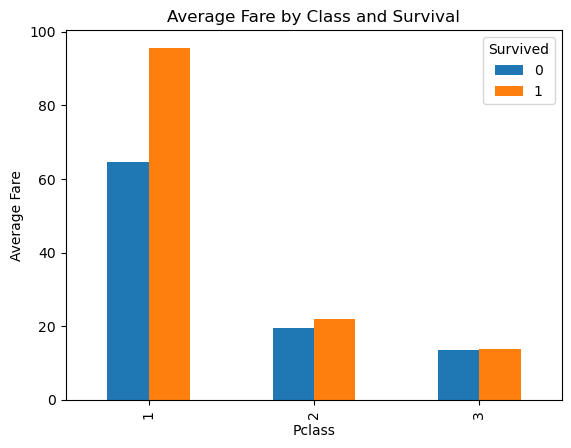

In [23]:
# Average fare by class and survival
print(df.groupby(['Pclass', 'Survived'])['Fare'].mean())

# Visualization
df.groupby(['Pclass', 'Survived'])['Fare'].mean().unstack().plot(kind='bar', stacked=False)
plt.title("Average Fare by Class and Survival")
plt.ylabel("Average Fare")
plt.show()

In [24]:
# IQR method for 'age'
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
outlier_condition = (df['Age'] < Q1 - 1.5 * IQR) | (df['Age'] > Q3 + 1.5 * IQR)
df[outlier_condition][['Age']]

,Age
33,66.0
54,65.0
96,71.0
116,70.5
280,65.0
456,65.0
493,71.0
630,80.0
672,70.0
745,70.0


In [25]:
from scipy.stats import zscore

# Z-score method
df['fare_z'] = zscore(df['Fare'].fillna(0))
outliers = df[df['fare_z'].abs() > 3]
print(f"Outliers based on fare (z-score > 3):\n{outliers[['Fare', 'fare_z']]}")


Outliers based on fare (z-score > 3):
         Fare    fare_z
27   263.0000  4.647001
88   263.0000  4.647001
118  247.5208  4.335332
258  512.3292  9.667167
299  247.5208  4.335332
311  262.3750  4.634417
341  263.0000  4.647001
377  211.5000  3.610065
380  227.5250  3.932723
438  263.0000  4.647001
527  221.7792  3.817033
557  227.5250  3.932723
679  512.3292  9.667167
689  211.3375  3.606793
700  227.5250  3.932723
716  227.5250  3.932723
730  211.3375  3.606793
737  512.3292  9.667167
742  262.3750  4.634417
779  211.3375  3.606793
